# Stock Price Prediction And Forecasting Using Stacked LSTM
LSTM = Long Short Term Memory

Using Keras and Tensorflow >2.0

****
###Problem statement
To get an intution of the of stock price movement for the next 30 days for better decision making.

###Stakeholders
1. Stock Broker
2. Equity traders
3. Investment adviser

###Business metric
1. Increasing ROI using Stock Forecasting
2. Understanding stock behavior and using it for better investment 

###Data science metric
Stock prices are volatile due to the viaration in prices based on different external factors such as change in laws, natural disasters, and other factors. Hence the need for a model that has a memeory component and can remember the current context.
 
****

Steps:
1. Collect stock data => AAPL
2. Preprocess data into train and test
3. Create an Stacked LSTM model
4. Predict test data and plot output
5. Predict future 30 days and plot the output
 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/some-stocks/AAPL.csv
/kaggle/input/some-stocks/GOOGL.csv


In [2]:
#Libs
import pandas_datareader as pdr
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn

import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

from numpy import array as arr

In [3]:
#Data Collection
ticker = 'AAPL'
file_to_save = '../input/some-stocks/%s.csv'%ticker
#my_apikey='<Enter your own api key here!!>'

# If you haven't already saved data,
# Go ahead and grab the data from the tiingo api
# And store date, low, high, volume, close, open values to a Pandas DataFrame
if not os.path.exists(file_to_save):
  df = pdr.get_data_tiingo(ticker , api_key=my_apikey)
  df.to_csv(file_to_save)
  df=pd.read_csv(file_to_save)
  print('Data saved to : %s'%file_to_save)        
  df.to_csv(file_to_save)

# If the data is already there, just load it from the CSV
else:
  print('File already exists. Loading data from CSV')
  df = pd.read_csv(file_to_save)

File already exists. Loading data from CSV


In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-11-30 00:00:00+00:00,118.30,119.41,117.75,117.99,39180322,27.396929,27.653993,27.269555,27.325137,156721288,0.0,1.0
1,1,AAPL,2015-12-01 00:00:00+00:00,117.34,118.81,116.86,118.75,34852374,27.174604,27.515039,27.063442,27.501144,139409496,0.0,1.0
2,2,AAPL,2015-12-02 00:00:00+00:00,116.28,118.11,116.08,117.05,33386563,26.929120,27.352927,26.882803,27.107443,133546252,0.0,1.0
3,3,AAPL,2015-12-03 00:00:00+00:00,115.20,116.79,114.22,116.55,41569509,26.679005,27.047230,26.452048,26.991649,166278036,0.0,1.0
4,4,AAPL,2015-12-04 00:00:00+00:00,119.03,119.25,115.11,115.29,57776977,27.565989,27.616938,26.658162,26.699848,231107908,0.0,1.0


In [5]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-11-19 00:00:00+00:00,118.64,119.0600,116.81,117.59,74112972,118.64,119.0600,116.81,117.59,74112972,0.0,1.0
1254,1254,AAPL,2020-11-20 00:00:00+00:00,117.34,118.7700,117.29,118.64,73604287,117.34,118.7700,117.29,118.64,73604287,0.0,1.0
1255,1255,AAPL,2020-11-23 00:00:00+00:00,113.85,117.6202,113.75,117.18,127959318,113.85,117.6202,113.75,117.18,127959318,0.0,1.0
1256,1256,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.91,113226248,115.17,115.8500,112.59,113.91,113226248,0.0,1.0
1257,1257,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,116.03,116.7500,115.17,115.55,76499234,0.0,1.0


In [6]:
df1=df.reset_index()['close']

In [7]:
print(df1.shape)
df1[1200]

(1258,)


120.96

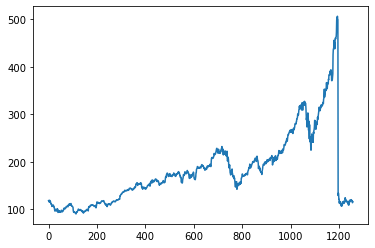

In [8]:
plt.plot(df1)
plt.show()

In [9]:
#data scaling scaling values between 0 to 1
#because LSTM is very data sensitive
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.06725195]
 [0.06494287]
 [0.06239327]
 ...
 [0.05654841]
 [0.05972339]
 [0.06179194]]


In [11]:
#train and test split
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [12]:
train_size,test_size

(817, 441)

In [13]:
#convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]     #i=0, 0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [14]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [15]:
print(X_train)

[[0.06725195 0.06494287 0.06239327 ... 0.04038485 0.03759471 0.03689717]
 [0.06494287 0.06239327 0.05979555 ... 0.03759471 0.03689717 0.035454  ]
 [0.06239327 0.05979555 0.06900782 ... 0.03689717 0.035454   0.03369814]
 ...
 [0.32567649 0.32933253 0.33419122 ... 0.19648827 0.19415514 0.19874925]
 [0.32933253 0.33419122 0.34090198 ... 0.19415514 0.19874925 0.20177992]
 [0.33419122 0.34090198 0.33108839 ... 0.19874925 0.20177992 0.20202044]]


In [16]:
print(X_train.shape), print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [17]:
print(X_test.shape), print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [18]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
#Creating LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0087 - val_loss: 0.0631
Epoch 2/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0022 - val_loss: 0.0223
Epoch 3/100
12/12 [==============================] - 2s 159ms/step - loss: 5.9327e-04 - val_loss: 0.0218
Epoch 4/100
12/12 [==============================] - 2s 158ms/step - loss: 4.2249e-04 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 2s 163ms/step - loss: 3.6186e-04 - val_loss: 0.0192
Epoch 6/100
12/12 [==============================] - 2s 157ms/step - loss: 3.4578e-04 - val_loss: 0.0187
Epoch 7/100
12/12 [==============================] - 2s 159ms/step - loss: 3.3640e-04 - val_loss: 0.0182
Epoch 8/100
12/12 [==============================] - 2s 160ms/step - loss: 3.2309e-04 - val_loss: 0.0179
Epoch 9/100
12/12 [==============================] - 2s 161ms/step - loss: 3.0811e-04 - val_loss: 0.0175
Epoch 10/100
12/12 [==============================] - 2s 163ms/

In [21]:
#Do prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
#Transform value to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
#Calculate RMSE performance metrics
rmse_metric = math.sqrt(mean_squared_error(Y_train,train_predict))
print("RMSE performance mertic:{}".format(rmse_metric))

#Test data RMSE
rmse_test = math.sqrt(mean_squared_error(Y_test,test_predict))
print("RMSE for test data:{}".format(rmse_test))

RMSE performance mertic:158.6282113686402
RMSE for test data:271.585257785051


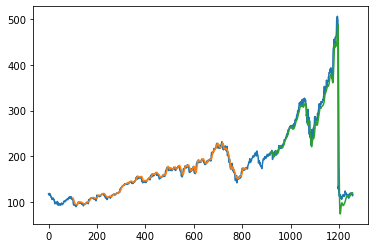

In [24]:
#Ploting
#shift train predictions for plotting
look_back=100 #window size
trainPredictPlot = np.empty_like(df1) 
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline
plt.plot(scaler.inverse_transform(df1))
#plot training predictions
plt.plot(trainPredictPlot)
#plot test predictions
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

441

In [26]:
X_input=test_data[341:].reshape(1,-1)
X_input.shape

(1, 100)

In [27]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [28]:
temp_input

[0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0

In [29]:
#next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    X_input=arr(temp_input[1:])
    print("{} day input {}".format(i,X_input))
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1, n_steps, 1))
    #print(X_input)
    Yhat = model.predict(X_input, verbose=0)
    print("{} day output {}".format(i,Yhat))
    temp_input.extend(Yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(Yhat.tolist())
    i=i+1
  else:
    X_input = X_input.reshape((1, n_steps, 1))
    Yhat = model.predict(X_input, verbose=0)
    print(Yhat[0])
    temp_input.extend(Yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(Yhat.tolist())
    i=i+1

print(lst_output)

[0.06761906]
101
1 day input [0.7039567  0.70556825 0.70131088 0.71651233 0.72293446 0.711365
 0.70948888 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029
 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0

In [30]:
len(df1)

1258

In [31]:
df_final=df1.tolist()
df_final.extend(lst_output)
len(df_final)

1288

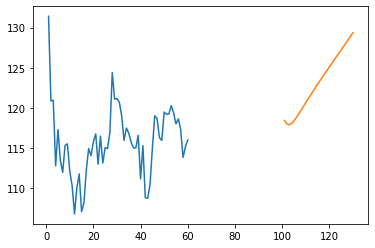

In [32]:
day_new=np.arange(1,61)
day_pred=np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1198:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

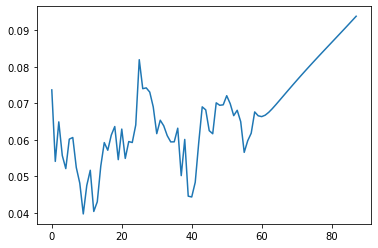

In [33]:
plt.plot(df_final[1200:])